# Prepration


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sklearn
import pandas as pd

datas = pd.read_csv('/content/drive/MyDrive/data/UIO.csv')
print(datas.isna().sum())


University                0
Abbreviation              0
Department                0
Course title              2
Unit                    130
Professor              1794
Objective              1794
Prerequisite              0
Required Skills        1794
Outcome                 569
References             1794
Scores                 1794
Description             539
Projects               1794
University Homepage       0
Course Homepage           0
Professor Homepage     1794
dtype: int64


In [ ]:
datas.drop(columns=['Professor','Objective','Required Skills','References','Scores','Projects','Professor Homepage'],inplace=True)
datas.isna().sum()

University               0
Abbreviation             0
Department               0
Course title             2
Unit                   130
Prerequisite             0
Outcome                569
Description            539
University Homepage      0
Course Homepage          0
dtype: int64

In [ ]:
datas.fillna(' ',inplace=True)
datas.isna().sum()

University             0
Abbreviation           0
Department             0
Course title           0
Unit                   0
Prerequisite           0
Outcome                0
Description            0
University Homepage    0
Course Homepage        0
dtype: int64

# Column Integration

In [ ]:
datas['integrated'] = datas['Outcome'] + datas['Description'] + datas['Course title'] 
datas.head()

University Abbreviation Department  \
0  University of Oslo          UIO  Dentistry   
1  University of Oslo          UIO  Education   
2  University of Oslo          UIO  Education   
3  University of Oslo          UIO  Education   
4  University of Oslo          UIO  Education   

                                        Course title Unit  \
0                             8th semester Dentistry   27   
1                           Quality English Teaching   10   
2       Master's Thesis in English subject didactics   30   
3                       English in and out of school   10   
4  Organisation, Governance and Management of Hig...   15   

                                        Prerequisite  \
0  \nPrerequisites\nFormal prerequisite knowledge...   
1  \nPrerequisites\nFormal prerequisite knowledge...   
2  \nPrerequisites\nFormal prerequisite knowledge...   
3  \nPrerequisites\nFormal prerequisite knowledge...   
4  \nPrerequisites\nFormal prerequisite knowledge...   

                                             Outcome  \
0  \nLearning outcome\nThe emphasis is on oral re...   
1  \nLearning outcome\nAfter completing the cours...   
2  \nLearning outcome\nAfter completing the subje...   
3  \nLearning outcome\nAfter completing this cour...   
4  \nLearning outcome\nUnit 1: Higher education g...   

                                         Description University Homepage  \
0  \nCourse content\nTheory and clinical practice...  https://www.uio.no   
1  \nCourse content\nThe course gives you insight...  https://www.uio.no   
2  \nCourse content\nThe Master’s thesis allows y...  https://www.uio.no   
3  \nCourse content\nThe course gives you insight...  https://www.uio.no   
4  \nCourse content\nThe course consist of two un...  https://www.uio.no   

                                     Course Homepage  \
0  https://www.uio.no/studier/emner/odont/tannleg...   
1  https://www.uio.no/studier/emner/uv/ils/EDID40...   
2  https://www.uio.no/studier/emner/uv/ils/EDID40...   
3  https://www.uio.no/studier/emner/uv/ils/EDID41...   
4  https://www.uio.no/studier/emner/uv/iped/HEM22...   

                                          integrated  
0  \nLearning outcome\nThe emphasis is on oral re...  
1  \nLearning outcome\nAfter completing the cours...  
2  \nLearning outcome\nAfter completing the subje...  
3  \nLearning outcome\nAfter completing this cour...  
4  \nLearning outcome\nUnit 1: Higher education g...

# Tokenization

In [ ]:
import nltk
nltk.download('punkt')
#print(type(datas['integrated']))

datas['tokenized'] = datas['integrated'].apply(lambda x : nltk.word_tokenize(str(x)))
datas['tokenized']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0       [Learning, outcome, The, emphasis, is, on, ora...
1       [Learning, outcome, After, completing, the, co...
2       [Learning, outcome, After, completing, the, su...
3       [Learning, outcome, After, completing, this, c...
4       [Learning, outcome, Unit, 1, :, Higher, educat...
                              ...                        
1789    [Learning, outcome, The, student, will, acquir...
1790    [Learning, outcome, Knowledge, of, different, ...
1791    [Learning, outcome, The, students, will, obtai...
1792    [Learning, outcome, •, Provide, students, with...
1793    [Learning, outcome, To, develop, students, ’, ...
Name: tokenized, Length: 1794, dtype: object

In [ ]:
datas.isna().sum()

University             0
Abbreviation           0
Department             0
Course title           0
Unit                   0
Prerequisite           0
Outcome                0
Description            0
University Homepage    0
Course Homepage        0
integrated             0
tokenized              0
dtype: int64

# Remove Stop Word

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
english_words = set(stopwords.words('english')) | set(string.punctuation) 
english_words.add('•')
print(english_words)
print('the' in english_words)
def remove(x):
  res = []
  for y in x :
      if str(y).lower() not in english_words:
        res.append(y)
  return res

datas['removedStopWords'] = datas['tokenized'].apply(lambda x:remove(x))

datas['removedStopWords']

{'in', 'up', 'where', 'because', "wasn't", 'they', '*', 'your', 'their', 'has', 'am', 'these', 'll', 'for', ':', 'yourself', 'have', "needn't", 'such', "couldn't", 'is', 'me', 'an', 'if', 'through', 'to', 'o', '`', 'by', 'being', 'doesn', 's', 'him', 'shan', 'hadn', 'then', 'of', 'than', 'won', '!', 'my', 'but', "isn't", 've', '•', "wouldn't", 'some', 'from', 'hers', "you're", 'only', "you'll", 'm', '?', "shan't", "didn't", 'shouldn', 'ours', 'was', 'which', 'does', "aren't", 'while', 'out', 'weren', '"', 'same', 'theirs', '%', 'when', '#', 'can', "should've", 'having', 'with', 'why', "that'll", 'don', ',', "haven't", 'will', '=', '(', 'off', '^', 'its', 'this', '_', '-', "weren't", 'after', 'her', 'how', '}', 'during', 'down', 'couldn', 'hasn', 'had', 'each', ']', 'until', 'myself', 'those', 'nor', 'yours', 'itself', 'should', 'at', "don't", 're', "won't", "you've", 'the', '\\', 'or', 'be', 'own', 'just', 'he', "she's", "'", '$', 'our', '[', 'his', 'above', 'once', "hasn't", 'she', 'w

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0       [Learning, outcome, emphasis, oral, rehabilita...
1       [Learning, outcome, completing, course, acquir...
2       [Learning, outcome, completing, subject, learn...
3       [Learning, outcome, completing, course, acquir...
4       [Learning, outcome, Unit, 1, Higher, education...
                              ...                        
1789    [Learning, outcome, student, acquire, Advanced...
1790    [Learning, outcome, Knowledge, different, rese...
1791    [Learning, outcome, students, obtain, critical...
1792    [Learning, outcome, Provide, students, in-dept...
1793    [Learning, outcome, develop, students, ’, crit...
Name: removedStopWords, Length: 1794, dtype: object

# Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text
datas['stemmed_removedStopWords'] = datas['removedStopWords'].apply(lambda x:stemming(x))
datas['stemmed_regular'] = datas['tokenized'].apply(lambda x :stemming(x))
print(datas['stemmed_removedStopWords'])
print(datas['stemmed_regular'])

0       [learn, outcom, emphasi, oral, rehabilit, with...
1       [learn, outcom, complet, cours, acquir, knowle...
2       [learn, outcom, complet, subject, learnt, know...
3       [learn, outcom, complet, cours, acquir, knowle...
4       [learn, outcom, unit, 1, higher, educ, govern,...
                              ...                        
1789    [learn, outcom, student, acquir, advanc, knowl...
1790    [learn, outcom, knowledg, differ, research, me...
1791    [learn, outcom, student, obtain, critic, skill...
1792    [learn, outcom, provid, student, in-depth, und...
1793    [learn, outcom, develop, student, ’, critic, u...
Name: stemmed_removedStopWords, Length: 1794, dtype: object
0       [learn, outcom, the, emphasi, is, on, oral, re...
1       [learn, outcom, after, complet, the, cours, ,,...
2       [learn, outcom, after, complet, the, subject, ...
3       [learn, outcom, after, complet, thi, cours, ,,...
4       [learn, outcom, unit, 1, :, higher, educ, gove...
            

# Lemmanization

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text
datas['Lemmanizated_removedStopWords'] = datas['removedStopWords'].apply(lambda x : lemmatizer(x))
datas['Lemmanizated_regular'] = datas['tokenized'].apply(lambda x :lemmatizer(x))
print(datas['Lemmanizated_removedStopWords'])
print(datas['Lemmanizated_regular'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


0       [Learning, outcome, emphasis, oral, rehabilita...
1       [Learning, outcome, completing, course, acquir...
2       [Learning, outcome, completing, subject, learn...
3       [Learning, outcome, completing, course, acquir...
4       [Learning, outcome, Unit, 1, Higher, education...
                              ...                        
1789    [Learning, outcome, student, acquire, Advanced...
1790    [Learning, outcome, Knowledge, different, rese...
1791    [Learning, outcome, student, obtain, critical,...
1792    [Learning, outcome, Provide, student, in-depth...
1793    [Learning, outcome, develop, student, ’, criti...
Name: Lemmanizated_removedStopWords, Length: 1794, dtype: object
0       [Learning, outcome, The, emphasis, is, on, ora...
1       [Learning, outcome, After, completing, the, co...
2       [Learning, outcome, After, completing, the, su...
3       [Learning, outcome, After, completing, this, c...
4       [Learning, outcome, Unit, 1, :, Higher, educat...
       

# Extract Statistical infoes

In [ ]:
ji = datas['Department']
print(ji.describe())
ki = datas['Course title']
ki.dropna()
print(ki.describe())

print(datas['Department'].value_counts())

#for k in datas['Course title'].unique():
  

count           1794
unique             8
top       Humanities
freq             571
Name: Department, dtype: object
count                                 1794
unique                                1376
top       Social Sciences Special Syllabus
freq                                     6
Name: Course title, dtype: object
Humanities                          571
Mathematics and Natural Sciences    547
Social Sciences                     309
Medicine                            139
Education                           112
Law                                  93
Theology and Religion                22
Dentistry                             1
Name: Department, dtype: int64


# Keyword Extraction


In [ ]:
!pip install keybert
!pip install keybert[flair]
!pip install keybert[gensim]
!pip install keybert[spacy]
!pip install keybert[use]
from keybert import KeyBERT



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 1.9 MB/s 
     |████████████████████████████████| 232 kB 9.3 MB/s 
     |████████████████████████████████| 51 kB 6.8 MB/s 
     |████████████████████████████████| 4.4 MB 40.8 MB/s 
     |████████████████████████████████| 1.2 MB 35.9 MB/s 
     |████████████████████████████████| 101 kB 4.6 MB/s 
     |████████████████████████████████| 596 kB 36.4 MB/s 
     |████████████████████████████████| 6.6 MB 14.9 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=5eb77198a711552442cf9e952cb34d4a5b9dcc4e1c5f99c8e836800ccaf388cc
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.1-py3-none-any.whl size=125774 sha256=0df0b714d22f143ccaf7291a893259acb3a6f60fb9a878c3b2ff79a99e0984fc
  S

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keybert import KeyBERT

def cloudKeyBert(column):
  kw_model = KeyBERT()
  doc = []
  for u in datas['Department'].unique():
    d = []
  #print(u)
    data = datas[datas['Department'] == u]
    data_text = data[column].dropna()
    ti = []

    for k in data_text:
      ti.append(' '.join(k))
    #print(ti)
    d.append( kw_model.extract_keywords(docs=ti,keyphrase_ngram_range=(1,1),top_n=5))
    #kw_model.extract_keywords()
    doc.append(d)
  return doc

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#words = ''
#i = 0
#fig= plt.figure(figsize=(8,8), facecolor = None)
#j = len(doc) / 3 +1
#for d in doc:
#  words = ''.join(str(d))
#  print(d)
#  print(words)
#  wc = WordCloud(width=1000,height=1000,background_color='white',min_font_size=10).generate(words)
  
  
#  fig.add_subplot(j,3,i+1)
#  plt.imshow(wc)
#  plt.axis("off")
  
#  i += 1
def plotDoc(doc,title=None):
  words = ''
  i = 0
  fig= plt.figure(figsize=(8,8), facecolor = None)
  if title != None:
    fig.suptitle(title,fontsize=14)
  j = len(doc) / 3 +1
  for d in doc:
    words = ''.join(str(d))
    print(d)
    print(words)
    wc = WordCloud(width=1000,height=1000,background_color='white',min_font_size=10).fit_words(d)
  
    fig.add_subplot(j,3,i+1)
    plt.imshow(wc)
    plt.axis("off")
  
    i += 1
def convertToDic(doc,dep=True):
  li = {}
  if dep:
    for d in doc[0]:
       for co in d:
          if co[0] in li:
           li[co[0]] = (li[co[0]] + co[1]) /2
          else :
            li[co[0]] = co[1]
  else:
    for d in doc:
      li[d[0]] = d[1]
  return li

  #plt.tight_layout(pad = 25)

In [ ]:

integrated_KeyWords = cloudKeyBert('tokenized')
print(integrated_KeyWords)


  0%|          | 0.00/83.5M [00:00<?, ?B/s]

['Learning outcome The emphasis is on oral rehabilitation within the following areas : Toothloss/edentulous Cariology Pedontology Loss of supporting structures Malocclusion Gerodontology and ageing Oral tumours The following subjects are included : behavioural science and communication , cariology , gerodontology , dental ethics , endodontology , prosthetic dentistry and oral function , pedodontics and behavioural sciences , periodontology , oral surgery and oral medicine , orthodontics , maxillofacial radiology , oral pathology , microbiology and infection control , biomaterial science , and pharmacology and pharmacotherapy . Learning outcomes Course content Theory and clinical practice is continued from the 7th semester . The practical competence is given high priority . At the same time the cause of diseases is highlighted . It is expected that students continue working on the master ’ s thesis during this semester which is to be submitted in the 10th semester . 8th semester Dentist

/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "
1it [00:00, 66.83it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['Learning outcome After completing the course , you should have acquired : Knowledge about teaching methods and classroom practices in the English school subject successful teaching in the English classroom the application of English topics in the classroom teaching and learning in English as a second language Skills to analyse and assess quality in English teaching practices reflect on own and others ’ English teaching carry out systematic observations of English teaching practices using observation data present and/or write scientific reports on English teaching develop research questions and research designs in English as a school subject Competence to continuously develop your English teacher professionalism apply research-based knowledge in the development of your English teaching practices Course content The course gives you insight into quality teaching in English as a school subject in Norway . Based on observations of English lessons in Norwegian secondary schools , we discus

112it [00:00, 492.86it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


["Learning outcome Learning to work independently with a minor project report Experience of working in a team in an international work environment Planning , execution and completion of a professional project Increased awareness of competence , in particular the connection between theory and practice Useful foundation for your own Master ’ s thesis Course content PP presentation from the information meeting February 5th 2019 . On AMS4900 you will spend the third semester of your MA degree doing an internship that will give you an opportunity to gain relevant work experience , use your academic skills in a practical manner , and present yourself in an international work environment . The internship must be carried out at an embassy/consulate or in an organisation/company in the Middle East , East Asia or South Asia , depending on your field of study . The semester will be split between your own work with a report and the work you will carry out for the embassy or organisation . 12-18 ho

571it [00:01, 460.26it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


["Learning outcome This course enables students to link their theoretical studies to deepening understanding of human rights practice , which , then , by doing a student led advocacy intervention during teaching time and then the internship after the semester , creates a feedback loop to enhancing theory and critical reflection . Upon completion of this course , students will have acquired the following . Knowledge : Good knowledge of key issues in human rights practice . Good knowledge of how and why selected human rights are implemented and applied in practice . Good knowledge of the ethical issues and challenges that arise in human rights practice . Knowledge about human rights actors work , exemplified by good knowledge of one specific human rights actor ’ s practice ( advocacy intervention ) and then the internship . Knowledge of the tools and tactics at the disposal of human rights practitioners . Knowledge and experience of academic freedom Skills : Ability to identify and analy

93it [00:00, 467.18it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['Observational Astronomy', 'Cosmology I', 'Astrophysical Plasma and Stellar Interiors', 'Radiative Processes in Astrophysics', 'Cosmology and Extragalactic Astronomy', 'Numerical Modeling', 'Cosmology II', 'Cosmological Component Separation', 'Solar and stellar physics', 'Astronomy . Master Thesis', 'Numerical Modeling', 'Cosmological Component Separation', 'Stellar Atmospheres II', 'Cosmology II', 'Biogeography and Biodiversity', 'Evolution and Systematics of Organismal Groups : The Fungal Kingdom', 'Biogeography and Biodiversity', 'Evolution and Systematics of Organismal Groups : The Fungal Kingdom', 'Systematics and Ecology of Marine Algae', 'Bioinformatics for Environmental Sequencing ( DNA metabarcoding )', 'Computational physiology', 'Bioinformatics for Molecular Biology', 'Computational physiology', 'Bioinformatics for Molecular Biology', 'Animal Behaviour', 'Molecular Biology', 'Design and analysis of biological studies', 'Biogeochemistry', 'Evolution', 'Fungal biology', 'Mari

547it [00:00, 777.13it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


["Learning outcome The learning goals of the Eu-HEM Master Thesis and the final exam are : - To explore an area of health economics and/or health management in depth , to synthesize the main theories and models , and to discuss their applicability . - To perform scientific research on a topic approved by the study program individually and to report the study and its conclusions in a clear way . - To make an appropriate use of all the relevant knowledge and skills acquired in the study program , and not only of the specific topic covered by the thesis . - To acquire and demonstrate skills in scientific writing . Course content The master ’ s thesis is a research report written at the end of the master 's degree in Health Economics , Policy and Management . The master ’ s thesis must satisfy academic standards for publications . The thesis must include a clearly specified research objective . The thesis must provide arguments for the choice of methods used to meet the research objective.

139it [00:00, 425.09it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['Learning outcome Knowledge Deep postgraduate level overview of key perspectives in classical and contemporary anthropological perspectives . Appreciation of their relevance for contemporary academic and public policy debates . Understanding of ongoing theoretical debates and the potential position of the student ’ s own original research to the development of these debates Skills Ability to synthesise and critique a variety of theoretical positions and to use this understanding to contribute to the construction of a unique research agenda . Construction of an academic argument . Writing academic texts . General competence Enhance oral presentation skills . Enhanced team-work capability and group-presentations . The ability to express arguments in solid academic written English ( via essay writing and shorter reflection papers ) . Course content This course gives you a broad and advanced grounding in the major theoretical approaches in Social Anthropology whilst positioning Anthropolo

309it [00:00, 386.94it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['Learning outcome 1 . Upon completion of the course , students should have obtained knowledge from across the three mainstream Buddhist traditions , how Buddhists care for each other within their communities , not only in Asia and Europe , but also in Norway . How is such caring based in Buddhist root texts , how are these texts applied to contemporary contexts , and how are they complemented by today ’ s knowledge and skills ? 2 . By means of self thinking , creative work , joint reflection , and discussion a basic understanding and sensitivity should be developed to realize , what Buddhists have in common , and how their views , practices , and needs may differ , especially when facing suffering in existential crises , conflict , and other difficult situations . How do Buddhists deal with old age , illness and death , which rituals are important to them , what are they ultimately striving for , and how do they relate to questions such as organ donation , abortion , domestic violence

22it [00:00, 367.35it/s]

[[[[('periodontology', 0.4825), ('oral', 0.4883), ('dental', 0.5503), ('endodontology', 0.5604), ('dentistry', 0.5909)]]], [[[('english', 0.2828), ('classroom', 0.313), ('study', 0.3284), ('teach', 0.3558), ('teaching', 0.3613)], [('academic', 0.3081), ('didactics', 0.3196), ('research', 0.3695), ('studies', 0.4197), ('thesis', 0.4552)], [('study', 0.3203), ('teaching', 0.3228), ('educational', 0.3324), ('classroom', 0.3341), ('english', 0.406)], [('administration', 0.4124), ('management', 0.4138), ('governance', 0.4348), ('universities', 0.4354), ('institutions', 0.4645)], [('studies', 0.351), ('curriculum', 0.3548), ('education', 0.374), ('academic', 0.4102), ('study', 0.4331)], [('develop', 0.3449), ('methods', 0.349), ('research', 0.3688), ('qualitative', 0.3906), ('methodology', 0.4021)], [('practice', 0.2985), ('techniques', 0.3257), ('methods', 0.3793), ('methodological', 0.3871), ('qualitative', 0.3958)], [('education', 0.3618), ('teaching', 0.3681), ('students', 0.3717), ('cur

In [ ]:

lemmatized_keywords = cloudKeyBert('Lemmanizated_removedStopWords')
#print(lemmatized_keywords)


['Learning outcome emphasis oral rehabilitation within following area Toothloss/edentulous Cariology Pedontology Loss supporting structure Malocclusion Gerodontology ageing Oral tumour following subject included behavioural science communication cariology gerodontology dental ethic endodontology prosthetic dentistry oral function pedodontics behavioural science periodontology oral surgery oral medicine orthodontics maxillofacial radiology oral pathology microbiology infection control biomaterial science pharmacology pharmacotherapy Learning outcome Course content Theory clinical practice continued 7th semester practical competence given high priority time cause disease highlighted expected student continue working master ’ thesis semester submitted 10th semester 8th semester Dentistry']


/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "
1it [00:00, 166.89it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['Learning outcome completing course acquired Knowledge teaching method classroom practice English school subject successful teaching English classroom application English topic classroom teaching learning English second language Skills analyse ass quality English teaching practice reflect others ’ English teaching carry systematic observation English teaching practice using observation data present and/or write scientific report English teaching develop research question research design English school subject Competence continuously develop English teacher professionalism apply research-based knowledge development English teaching practice Course content course give insight quality teaching English school subject Norway Based observation English lesson Norwegian secondary school discus element quality teaching English get opportunity explore teacher teach variety topic within English school subject classroom practice align research English didactics Collective workshop individual stud

112it [00:00, 242.25it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


["Learning outcome Learning work independently minor project report Experience working team international work environment Planning execution completion professional project Increased awareness competence particular connection theory practice Useful foundation Master ’ thesis Course content PP presentation information meeting February 5th 2019 AMS4900 spend third semester degree internship give opportunity gain relevant work experience use academic skill practical manner present international work environment internship must carried embassy/consulate organisation/company Middle East East Asia South Asia depending field study semester split work report work carry embassy organisation 12-18 hour week set aside work report UiO individual student embassy/organisation must decide mutual consultation topic report Students meet requirement AMS4900 apply internship UiO 's agreement Ministry Foreign Affairs UD contact UD managed UiO NB student Norwegian citizenship find relevant internship meet

571it [00:01, 473.54it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


["Learning outcome course enables student link theoretical study deepening understanding human right practice student led advocacy intervention teaching time internship semester creates feedback loop enhancing theory critical reflection Upon completion course student acquired following Knowledge Good knowledge key issue human right practice Good knowledge selected human right implemented applied practice Good knowledge ethical issue challenge arise human right practice Knowledge human right actor work exemplified good knowledge one specific human right actor ’ practice advocacy intervention internship Knowledge tool tactic disposal human right practitioner Knowledge experience academic freedom Skills Ability identify analyse key issue practice human right Analyse identify ethical issue arise work human right practitioner Know main actor contribute human right practice able critically evaluate policy practice literature produced various actor within human right practice Research skill A

93it [00:00, 461.06it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['Observational Astronomy', 'Cosmology', 'Astrophysical Plasma Stellar Interiors', 'Radiative Processes Astrophysics', 'Cosmology Extragalactic Astronomy', 'Numerical Modeling', 'Cosmology II', 'Cosmological Component Separation', 'Solar stellar physic', 'Astronomy Master Thesis', 'Numerical Modeling', 'Cosmological Component Separation', 'Stellar Atmospheres II', 'Cosmology II', 'Biogeography Biodiversity', 'Evolution Systematics Organismal Groups Fungal Kingdom', 'Biogeography Biodiversity', 'Evolution Systematics Organismal Groups Fungal Kingdom', 'Systematics Ecology Marine Algae', 'Bioinformatics Environmental Sequencing DNA metabarcoding', 'Computational physiology', 'Bioinformatics Molecular Biology', 'Computational physiology', 'Bioinformatics Molecular Biology', 'Animal Behaviour', 'Molecular Biology', 'Design analysis biological study', 'Biogeochemistry', 'Evolution', 'Fungal biology', 'Marine Biology', 'Learning outcome completing course knowledge use terminology genetics de

547it [00:00, 754.56it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


["Learning outcome learning goal Eu-HEM Master Thesis final exam explore area health economics and/or health management depth synthesize main theory model discus applicability perform scientific research topic approved study program individually report study conclusion clear way make appropriate use relevant knowledge skill acquired study program specific topic covered thesis acquire demonstrate skill scientific writing Course content master ’ thesis research report written end master 's degree Health Economics Policy Management master ’ thesis must satisfy academic standard publication thesis must include clearly specified research objective thesis must provide argument choice method used meet research objective.The thesis topic must related one subject covered Eu-HEM specialization chosen track two possible alternative 1 – “ standard/monograph ” thesis approximately 20.000 word 50-60 page including note table attachment 2 – research paper “ ready submission ” annex extensive introduc

139it [00:00, 451.51it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['Learning outcome Knowledge Deep postgraduate level overview key perspective classical contemporary anthropological perspective Appreciation relevance contemporary academic public policy debate Understanding ongoing theoretical debate potential position student ’ original research development debate Skills Ability synthesise critique variety theoretical position use understanding contribute construction unique research agenda Construction academic argument Writing academic text General competence Enhance oral presentation skill Enhanced team-work capability group-presentations ability express argument solid academic written English via essay writing shorter reflection paper Course content course give broad advanced grounding major theoretical approach Social Anthropology whilst positioning Anthropology developing changing intellectual social context aim enable understand unique perspective social life facilitated anthropological theoretical perspective encourage use insight basis deve

309it [00:00, 437.25it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['Learning outcome 1 Upon completion course student obtained knowledge across three mainstream Buddhist tradition Buddhists care within community Asia Europe also Norway caring based Buddhist root text text applied contemporary context complemented today ’ knowledge skill 2 mean self thinking creative work joint reflection discussion basic understanding sensitivity developed realize Buddhists common view practice need may differ especially facing suffering existential crisis conflict difficult situation Buddhists deal old age illness death ritual important ultimately striving relate question organ donation abortion domestic violence sexual abuse Course content course student Buddhist belief life philosophy learn practice Buddhist chaplaincy spiritual care counseling exist within mainstream Buddhist tradition contemporary society across globe course focus particular importance attitude self-reflection well concept practice mindfulness compassion Depending individual background participa

22it [00:00, 361.83it/s]


In [ ]:
stemmed_keywords = cloudKeyBert('stemmed_removedStopWords')
#print(stemmed_keywords)

['learn outcom emphasi oral rehabilit within follow area toothloss/edentul cariolog pedontolog loss support structur malocclus gerodontolog age oral tumour follow subject includ behaviour scienc commun cariolog gerodontolog dental ethic endodontolog prosthet dentistri oral function pedodont behaviour scienc periodontolog oral surgeri oral medicin orthodont maxillofaci radiolog oral patholog microbiolog infect control biomateri scienc pharmacolog pharmacotherapi learn outcom cours content theori clinic practic continu 7th semest practic compet given high prioriti time caus diseas highlight expect student continu work master ’ thesi semest submit 10th semest 8th semest dentistri']


/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "
1it [00:00, 313.52it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['learn outcom complet cours acquir knowledg teach method classroom practic english school subject success teach english classroom applic english topic classroom teach learn english second languag skill analys assess qualiti english teach practic reflect other ’ english teach carri systemat observ english teach practic use observ data present and/or write scientif report english teach develop research question research design english school subject compet continu develop english teacher profession appli research-bas knowledg develop english teach practic cours content cours give insight qualiti teach english school subject norway base observ english lesson norwegian secondari school discuss element qualiti teach english get opportun explor teacher teach varieti topic within english school subject classroom practic align research english didact collect workshop individu studi form basi develop practice-bas research-inform english teacher profession qualiti english teach', "learn outcom 

112it [00:00, 543.38it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


["learn outcom learn work independ minor project report experi work team intern work environ plan execut complet profession project increas awar compet particular connect theori practic use foundat master ’ thesi cours content pp present inform meet februari 5th 2019 ams4900 spend third semest degre internship give opportun gain relev work experi use academ skill practic manner present intern work environ internship must carri embassy/consul organisation/compani middl east east asia south asia depend field studi semest split work report work carri embassi organis 12-18 hour week set asid work report uio individu student embassy/organis must decid mutual consult topic report student meet requir ams4900 appli internship uio 's agreement ministri foreign affair ud contact ud manag uio nb student norwegian citizenship find relev internship meet uio requir internship partner must agre sign faculti human internship agreement intern project term asia middl east", 'learn outcom complet cours k

571it [00:01, 515.35it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


["learn outcom cours enabl student link theoret studi deepen understand human right practic student led advocaci intervent teach time internship semest creat feedback loop enhanc theori critic reflect upon complet cours student acquir follow knowledg good knowledg key issu human right practic good knowledg select human right implement appli practic good knowledg ethic issu challeng aris human right practic knowledg human right actor work exemplifi good knowledg one specif human right actor ’ practic advocaci intervent internship knowledg tool tactic dispos human right practition knowledg experi academ freedom skill abil identifi analys key issu practic human right analys identifi ethic issu aris work human right practition know main actor contribut human right practic abl critic evalu polici practic literatur produc variou actor within human right practic research skill abil evalu inform develop network organis plan leadership team build skill evalu impact work gener compet abl perform

93it [00:00, 503.82it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['observ astronomi', 'cosmolog', 'astrophys plasma stellar interior', 'radi process astrophys', 'cosmolog extragalact astronomi', 'numer model', 'cosmolog ii', 'cosmolog compon separ', 'solar stellar physic', 'astronomi master thesi', 'numer model', 'cosmolog compon separ', 'stellar atmospher ii', 'cosmolog ii', 'biogeographi biodivers', 'evolut systemat organism group fungal kingdom', 'biogeographi biodivers', 'evolut systemat organism group fungal kingdom', 'systemat ecolog marin alga', 'bioinformat environment sequenc dna metabarcod', 'comput physiolog', 'bioinformat molecular biolog', 'comput physiolog', 'bioinformat molecular biolog', 'anim behaviour', 'molecular biolog', 'design analysi biolog studi', 'biogeochemistri', 'evolut', 'fungal biolog', 'marin biolog', 'learn outcom complet cours knowledg use terminolog genet development biolog understand main concept development biolog mechan principl know main morpholog principl develop reproduct classic model organ knowledg genet mol

547it [00:00, 762.55it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


["learn outcom learn goal eu-hem master thesi final exam explor area health econom and/or health manag depth synthes main theori model discuss applic perform scientif research topic approv studi program individu report studi conclus clear way make appropri use relev knowledg skill acquir studi program specif topic cover thesi acquir demonstr skill scientif write cours content master ’ thesi research report written end master 's degre health econom polici manag master ’ thesi must satisfi academ standard public thesi must includ clearli specifi research object thesi must provid argument choic method use meet research objective.th thesi topic must relat one subject cover eu-hem special chosen track two possibl altern 1 – “ standard/monograph ” thesi approxim 20.000 word 50-60 page includ note tabl attach 2 – research paper “ readi submiss ” annex extens introduct paper approxim 6000 word 17-20 page exclud annex refer accur referenc bibliographi import element thesi student adopt standard

139it [00:00, 485.31it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['learn outcom knowledg deep postgradu level overview key perspect classic contemporari anthropolog perspect appreci relev contemporari academ public polici debat understand ongo theoret debat potenti posit student ’ origin research develop debat skill abil synthesis critiqu varieti theoret posit use understand contribut construct uniqu research agenda construct academ argument write academ text gener compet enhanc oral present skill enhanc team-work capabl group-present abil express argument solid academ written english via essay write shorter reflect paper cours content cours give broad advanc ground major theoret approach social anthropolog whilst posit anthropolog develop chang intellectu social context aim enabl understand uniqu perspect social life facilit anthropolog theoret perspect encourag use insight basi develop research project cours cover number key concept debat classic contemporari anthropolog theori invit develop understand anthropolog theori add understand contemporar

309it [00:00, 432.83it/s]
/usr/local/lib/python3.7/dist-packages/keybert/_model.py:131: UserWarning: Although extracting keywords for multiple documents is faster than iterating over single documents, it requires significantly more memory to hold all word embeddings. Use this at your own discretion!
  "Although extracting keywords for multiple documents is faster "


['learn outcom 1 upon complet cours student obtain knowledg across three mainstream buddhist tradit buddhist care within commun asia europ also norway care base buddhist root text text appli contemporari context complement today ’ knowledg skill 2 mean self think creativ work joint reflect discuss basic understand sensit develop realiz buddhist common view practic need may differ especi face suffer existenti crise conflict difficult situat buddhist deal old age ill death ritual import ultim strive relat question organ donat abort domest violenc sexual abus cours content cours student buddhist belief life philosophi learn practic buddhist chaplainci spiritu care counsel exist within mainstream buddhist tradit contemporari societi across globe cours focu particular import attitud self-reflect well concept practic mind compass depend individu background particip mean input self-think work small group exchang plenum discuss reflect appli buddhist care practic norwegian institut hospit hosp

22it [00:00, 445.95it/s]


# plots

[[[('periodontology', 0.4825), ('oral', 0.4883), ('dental', 0.5503), ('endodontology', 0.5604), ('dentistry', 0.5909)]]]
[[[('periodontology', 0.4825), ('oral', 0.4883), ('dental', 0.5503), ('endodontology', 0.5604), ('dentistry', 0.5909)]]]
[[[('english', 0.2828), ('classroom', 0.313), ('study', 0.3284), ('teach', 0.3558), ('teaching', 0.3613)], [('academic', 0.3081), ('didactics', 0.3196), ('research', 0.3695), ('studies', 0.4197), ('thesis', 0.4552)], [('study', 0.3203), ('teaching', 0.3228), ('educational', 0.3324), ('classroom', 0.3341), ('english', 0.406)], [('administration', 0.4124), ('management', 0.4138), ('governance', 0.4348), ('universities', 0.4354), ('institutions', 0.4645)], [('studies', 0.351), ('curriculum', 0.3548), ('education', 0.374), ('academic', 0.4102), ('study', 0.4331)], [('develop', 0.3449), ('methods', 0.349), ('research', 0.3688), ('qualitative', 0.3906), ('methodology', 0.4021)], [('practice', 0.2985), ('techniques', 0.3257), ('methods', 0.3793), ('method

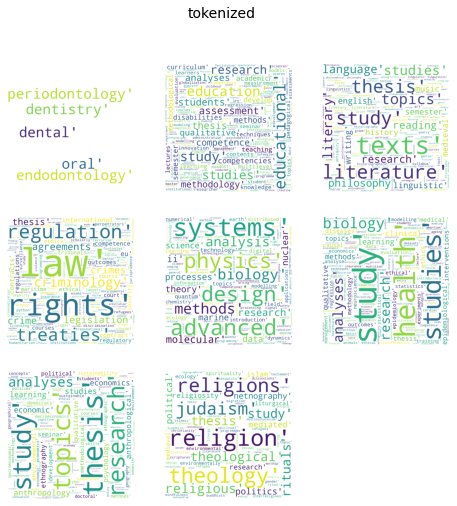

In [ ]:
plotDoc(integrated_KeyWords,'tokenized')


[[[('periodontology', 0.4615), ('oral', 0.4824), ('endodontology', 0.532), ('dental', 0.5371), ('dentistry', 0.5508)]]]
[[[('periodontology', 0.4615), ('oral', 0.4824), ('endodontology', 0.532), ('dental', 0.5371), ('dentistry', 0.5508)]]]
[[[('teacher', 0.3108), ('study', 0.3338), ('teach', 0.4007), ('classroom', 0.4013), ('teaching', 0.4376)], [('didactics', 0.3297), ('academic', 0.3396), ('research', 0.3484), ('thesis', 0.362), ('study', 0.4351)], [('student', 0.3235), ('study', 0.3804), ('teaching', 0.3932), ('classroom', 0.4062), ('educational', 0.4205)], [('organisation', 0.301), ('management', 0.3077), ('leadership', 0.3111), ('institution', 0.3121), ('education', 0.3223)], [('assessment', 0.3169), ('education', 0.3465), ('competencies', 0.3631), ('study', 0.3633), ('curriculum', 0.4278)], [('research', 0.2799), ('methods', 0.2882), ('qualitative', 0.3192), ('develop', 0.3214), ('methodology', 0.3446)], [('practice', 0.2869), ('methods', 0.2931), ('methodological', 0.3027), ('co

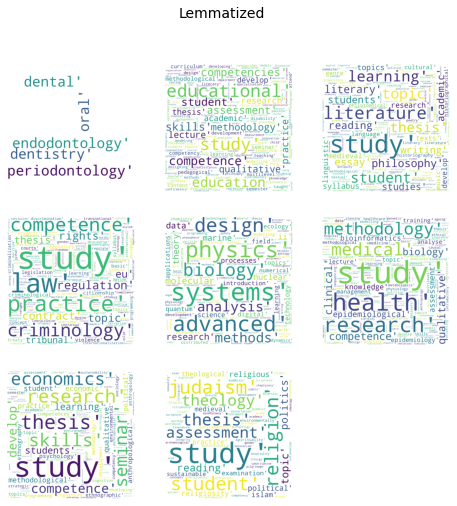

In [ ]:
plotDoc(lemmatized_keywords,'Lemmatized')


[[[('oral', 0.4626), ('orthodont', 0.4814), ('endodontolog', 0.4823), ('dentistri', 0.5145), ('dental', 0.5612)]]]
[[[('oral', 0.4626), ('orthodont', 0.4814), ('endodontolog', 0.4823), ('dentistri', 0.5145), ('dental', 0.5612)]]]
[[[('teacher', 0.3321), ('english', 0.3474), ('practic', 0.3804), ('classroom', 0.4079), ('teach', 0.4226)], [('teach', 0.2123), ('skill', 0.2155), ('develop', 0.2243), ('analysi', 0.233), ('research', 0.3527)], [('teacher', 0.2989), ('student', 0.3296), ('teach', 0.3609), ('english', 0.3628), ('classroom', 0.3913)], [('educ', 0.2705), ('polici', 0.2745), ('government', 0.2827), ('administr', 0.2962), ('leadership', 0.4291)], [('develop', 0.2758), ('teach', 0.279), ('student', 0.2866), ('practic', 0.3413), ('curriculum', 0.3576)], [('philosophi', 0.2824), ('introduct', 0.2875), ('design', 0.2983), ('develop', 0.3578), ('research', 0.3687)], [('qualit', 0.3071), ('assess', 0.3142), ('interview', 0.3154), ('develop', 0.3933), ('research', 0.4295)], [('practic', 

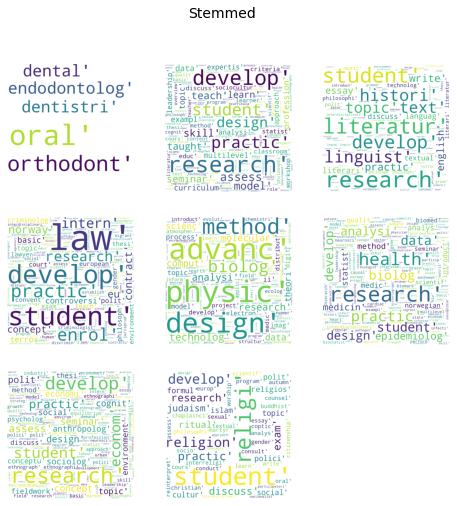

In [ ]:
plotDoc(stemmed_keywords,'Stemmed')

Law


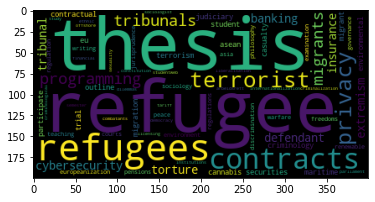

In [ ]:
x = convertToDic(lemmatized_keywords[3])
wc = WordCloud().generate_from_frequencies(x)
print(datas['Department'].unique()[3])
plt.imshow(wc)



# Frequent Pattern

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import pickle
import numpy as np

def getSetFromKeyWords(Depkeywords):
  ds = []
  #for dep in keywords:
  for cou in Depkeywords[0]:
    d = []
    for ke in cou:
      d.append(ke[0])
    if len(d) > 0:
      ds.append(d)
  return ds
def getItemsets(Tsets,minsup):
  
  te = TransactionEncoder()
  te_ary = te.fit(Tsets).transform(Tsets)
  df = pd.DataFrame(te_ary, columns=te.columns_)
#print(df)
  Itemsets = apriori(df,minsup,True)
  return Itemsets
def getRules(Itemsets,minConf):
  Rules = association_rules(Itemsets,min_threshold=minConf)
  return Rules


In [ ]:

x = getSetFromKeyWords(lemmatized_keywords[7])
print(len(x))
print(x)
i = getItemsets(x,0.1)
i


22
[['chaplaincy', 'mindfulness', 'counseling', 'buddhists', 'buddhist'], ['reading', 'religions', 'discussion', 'student', 'study'], ['topic', 'hospitality', 'citizenship', 'refugee', 'migration'], ['christianity', 'testament', 'judaism', 'scriptures', 'scripture'], ['assignment', 'topic', 'study', 'diversity', 'thesis'], ['study', 'assessment', 'religion', 'politics', 'political'], ['study', 'assessment', 'religion', 'politics', 'political'], ['study', 'religious', 'religion', 'theology', 'religiosity'], ['study', 'islam', 'gender', 'islamic', 'sexuality'], ['study', 'religious', 'religion', 'theology', 'religiosity'], ['secularism', 'islam', 'judaism', 'multiculturalism', 'study'], ['liturgical', 'worship', 'ritual', 'judaism', 'liturgy'], ['pilgrimage', 'student', 'reading', 'coptic', 'literature'], ['grade', 'oral', 'autumn', 'thesis', 'exam'], ['integrity', 'academic', 'dissertation', 'assessment', 'competency'], ['theological', 'medieval', 'practice', 'examination', 'study'], ['

support           itemsets
0  0.136364       (assessment)
1  0.181818          (judaism)
2  0.181818         (religion)
3  0.181818          (student)
4  0.545455            (study)
5  0.136364         (theology)
6  0.136364           (thesis)
7  0.181818  (religion, study)
8  0.136364  (theology, study)

In [ ]:
y = getRules(i,0.1)
y

antecedents consequents  antecedent support  consequent support   support  \
0  (religion)     (study)            0.181818            0.545455  0.181818   
1     (study)  (religion)            0.545455            0.181818  0.181818   
2  (theology)     (study)            0.136364            0.545455  0.136364   
3     (study)  (theology)            0.545455            0.136364  0.136364   

   confidence      lift  leverage  conviction  
0    1.000000  1.833333  0.082645         inf  
1    0.333333  1.833333  0.082645    1.227273  
2    1.000000  1.833333  0.061983         inf  
3    0.250000  1.833333  0.061983    1.151515

In [ ]:

x = getSetFromKeyWords(lemmatized_keywords[1])
print(len(x))
print(x)
i = getItemsets(x,0.1)
i


112
[['teacher', 'study', 'teach', 'classroom', 'teaching'], ['didactics', 'academic', 'research', 'thesis', 'study'], ['student', 'study', 'teaching', 'classroom', 'educational'], ['organisation', 'management', 'leadership', 'institution', 'education'], ['assessment', 'education', 'competencies', 'study', 'curriculum'], ['research', 'methods', 'qualitative', 'develop', 'methodology'], ['practice', 'methods', 'methodological', 'competence', 'qualitative'], ['competency', 'education', 'teaching', 'pedagogical', 'curriculum'], ['administration', 'institution', 'education', 'leadership', 'governance'], ['economization', 'globalization', 'internationalization', 'education', 'globalisation'], ['teach', 'methodological', 'methodology', 'seminar', 'thesis'], ['skills', 'competence', 'thesis', 'develop', 'courses'], ['developing', 'student', 'competence', 'education', 'thesis'], ['data', 'dataset', 'programming', 'analyses', 'study'], ['study', 'regression', 'models', 'modeling', 'modelling'],

support                  itemsets
0   0.133929              (assessment)
1   0.178571              (competence)
2   0.142857            (competencies)
3   0.223214               (education)
4   0.401786             (educational)
5   0.116071             (methodology)
6   0.107143                (practice)
7   0.107143             (qualitative)
8   0.142857                  (skills)
9   0.142857                 (student)
10  0.383929                   (study)
11  0.116071  (educational, education)
12  0.142857      (educational, study)

In [ ]:
y = getRules(i,0.1)
y

antecedents    consequents  antecedent support  consequent support  \
0  (educational)    (education)            0.401786            0.223214   
1    (education)  (educational)            0.223214            0.401786   
2  (educational)        (study)            0.401786            0.383929   
3        (study)  (educational)            0.383929            0.401786   

    support  confidence      lift  leverage  conviction  
0  0.116071    0.288889  1.294222  0.026387    1.092355  
1  0.116071    0.520000  1.294222  0.026387    1.246280  
2  0.142857    0.355556  0.926098 -0.011400    0.955973  
3  0.142857    0.372093  0.926098 -0.011400    0.952712

In [ ]:
from sentence_transformers import SentenceTransformer

# save to file

In [ ]:
from pathlib import Path  

filepath = Path('drive/MyDrive/data/out3.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)
datas.to_csv(filepath,index=False)

In [ ]:
import pickle
with open('drive/MyDrive/data/integrated3', "wb") as fp:   #Pickling
  pickle.dump(integrated_KeyWords,fp)
with open('drive/MyDrive/data/lemm3', "wb") as fp:   #Pickling
  pickle.dump(lemmatized_keywords,fp)
with open('drive/MyDrive/data/stemmed3', "wb") as fp:   #Pickling
  pickle.dump(stemmed_keywords,fp)

# Load From File

In [ ]:
import pickle
integrated_KeyWords = []
with open('drive/MyDrive/data/integrated', "rb") as fp:   #Pickling
  integrated_KeyWords = pickle.load(fp)
print(integrated_KeyWords)

[[[('semester dentistry', 0.6824), ('semester 8th semester dentistry', 0.6639), ('8th semester dentistry', 0.6599), ('dentistry oral', 0.6243), ('dentistry', 0.5909)]], [[('english lessons norwegian secondary', 0.7046), ('quality english teaching practices', 0.6866), ('successful teaching english classroom', 0.6623), ('assess quality english teaching', 0.659), ('english teaching practices course', 0.6575)], [('thesis english subject didactics', 0.6117), ('master thesis english subject', 0.5492), ('master thesis english', 0.5358), ('english subject didactics', 0.5291), ('research skills understand analyse', 0.5249)], [('use english outside school', 0.6931), ('english school subject norway', 0.6832), ('english use outside school', 0.6731), ('school teaching learning english', 0.6644), ('teaching learning english school', 0.658)], [('unit higher education governance', 0.7088), ('characteristics higher education governance', 0.6903), ('higher education governance policy', 0.6811), ('higher

In [ ]:
(integrated_KeyWords[1][0][5])

[('research methods statistics course', 0.5965),
 ('research research methods statistics course', 0.6068),
 ('course provide introduction social science', 0.6071),
 ('learning outcome aim course provide', 0.6104),
 ('outcome aim course provide introduction', 0.6213)]